# Hands-On Exercise 6.1:
# Working with Logistic Regression in Python
***

## Objectives

#### In this exercise, you will work with logistic regression using Python. This exercise allows you to predict a target variable from a number of predictor variables. The goal is to show you how logistic regression models can be used to predict unknown values from a model trained on an existing data set.

### Overview

You will work on a data set called Adult that you will import from a csv file. You will:<br>
● Review the data within the data set and transform it into a format suitable for use in logistic regression<br>
● Examine the predictor variables<br>
● Train a logistic regression model that can be used to make future predictions<br><br>

**Pre-step: Execute the following cell in order to suppress warning messages**

In [2]:
import warnings
warnings.filterwarnings("ignore")

1. ❏ Import **pandas** and **numpy**

In [3]:
import pandas as pd
import numpy as np

2. ❏ Read in the **Adult.csv** dataset into a dataframe and preview it

In [4]:
AdultData = pd.read_csv('Adult.csv')
AdultData.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATIONNUM,MARITALSTATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITALGAIN,CAPITALLOSS,HOURSPERWEEK,NATIVECOUNTRY,ABOVE50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


3. ❏ Check if there are any missing values in each column of the columns

In [5]:
AdultData.isnull().any()

AGE              False
WORKCLASS        False
FNLWGT           False
EDUCATION        False
EDUCATIONNUM     False
MARITALSTATUS    False
OCCUPATION       False
RELATIONSHIP     False
RACE             False
SEX              False
CAPITALGAIN      False
CAPITALLOSS      False
HOURSPERWEEK     False
NATIVECOUNTRY    False
ABOVE50K         False
dtype: bool

4. ❏ Check how many different values there are for each feature

In [6]:
AdultData.nunique()

AGE                 73
WORKCLASS            9
FNLWGT           21648
EDUCATION           16
EDUCATIONNUM        16
MARITALSTATUS        7
OCCUPATION          15
RELATIONSHIP         6
RACE                 5
SEX                  2
CAPITALGAIN        119
CAPITALLOSS         92
HOURSPERWEEK        94
NATIVECOUNTRY       42
ABOVE50K             2
dtype: int64

5. ❏ Examine the structure of the dataset using the **.shape, .columns and .dtypes** attributes

In [7]:
AdultData.shape

(32561, 15)

In [8]:
AdultData.columns

Index(['AGE', 'WORKCLASS', 'FNLWGT', 'EDUCATION', 'EDUCATIONNUM',
       'MARITALSTATUS', 'OCCUPATION', 'RELATIONSHIP', 'RACE', 'SEX',
       'CAPITALGAIN', 'CAPITALLOSS', 'HOURSPERWEEK', 'NATIVECOUNTRY',
       'ABOVE50K'],
      dtype='object')

In [9]:
AdultData.dtypes

AGE               int64
WORKCLASS        object
FNLWGT            int64
EDUCATION        object
EDUCATIONNUM      int64
MARITALSTATUS    object
OCCUPATION       object
RELATIONSHIP     object
RACE             object
SEX              object
CAPITALGAIN       int64
CAPITALLOSS       int64
HOURSPERWEEK      int64
NATIVECOUNTRY    object
ABOVE50K          int64
dtype: object

6a. ❏ Preview and dummy code the **RELATIONSHIP** variable

In [10]:
AdultData['RELATIONSHIP'].head()

0     Not-in-family
1           Husband
2     Not-in-family
3           Husband
4              Wife
Name: RELATIONSHIP, dtype: object

In [11]:
REL = pd.get_dummies(AdultData['RELATIONSHIP'], drop_first=True)

REL.head()

,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


6b. ❏ Preview and dummy code the **OCCUPATION** variable

In [12]:
AdultData['OCCUPATION'].head()

0          Adm-clerical
1       Exec-managerial
2     Handlers-cleaners
3     Handlers-cleaners
4        Prof-specialty
Name: OCCUPATION, dtype: object

In [13]:
OCC = pd.get_dummies(AdultData['OCCUPATION'], drop_first=True)

OCC.head()

,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0


7. ❏ Join these two dummy coded variables to **'AGE', 'CAPITALGAIN',
'EDUCATIONNUM'** to make up the predictor variable dataset

In [14]:
X = REL.join(OCC.join(AdultData[['AGE','CAPITALGAIN','EDUCATIONNUM']]))

8. ❏ Create a target variable dataframe containing **'ABOVE50K'**

In [15]:
y = AdultData['ABOVE50K']

9. ❏ Split target and predictor variables into training and test datasets using the **train_test_split** library from **sklearn.model_selection**

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

10. ❏ Import the **LogisticRegression** library from **sklearn.linear_model**

In [17]:
from sklearn.linear_model import LogisticRegression

11. ❏ Instantiate the logistic regression model

In [18]:
logisticRegr = LogisticRegression()

12. ❏ Train the model on the data

In [19]:
logisticRegr.fit(x_train, y_train)

LogisticRegression()

13. ❏ Examine the coefficients produced by the model

In [20]:
logisticRegr.coef_

array([[-2.49945832e+00, -9.84545116e-01, -3.31086104e+00,
        -2.49612940e+00,  4.30073133e-01, -5.45041405e-01,
        -4.08066565e-03,  1.01175710e-01,  6.83656598e-01,
        -5.55997400e-01, -8.08973789e-01, -7.05971185e-01,
        -1.65440607e+00, -1.13581653e-01,  6.18386065e-01,
         2.26085752e-01,  5.35966260e-01,  3.01746199e-01,
        -2.53000068e-01,  1.12653370e-02,  3.10265245e-04,
         2.19748556e-01]])

14. ❏ Use the model to make predictions for the test dataset

In [21]:
predictions = logisticRegr.predict(x_test)
print(predictions)

[0 0 1 ... 0 1 0]


15. ❏ Use the **score()** method to get the accuracy of the model

In [22]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.8430168283994596


16. ❏ Calculate the **Mean Square Error (MSE)**

In [23]:
mse = np.mean((predictions-y_test)**2)
print(mse)

0.15698317160054048


17. ❏ Import **confusion_matrix** from **sklearn.metrics**

In [24]:
from sklearn.metrics import confusion_matrix

18. ❏ Create and display a **confusion matrix**

In [25]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[5708  451]
 [ 827 1155]]


19. ❏ Import **roc_auc_score** and **roc_curve** from **sklearn.metrics**

In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

20. ❏ Calculate the **auc score**

In [27]:
roc_auc_score(y_test, logisticRegr.predict(x_test))

0.7547592646204213

21. ❏ Import **matplotlib.pyplot**

In [28]:
import matplotlib.pyplot as plt

22. ❏ Calculate **false positive rates, true positive rates**, and **thresholds** using the **roc_curve()** function and plot them 

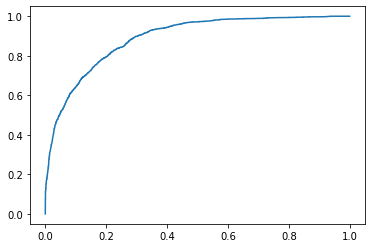

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, logisticRegr.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr)

## <center>**Congratulations! You have completed the exercise.**</center>

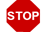

# <center>**This is the end of the exercise.**</center>